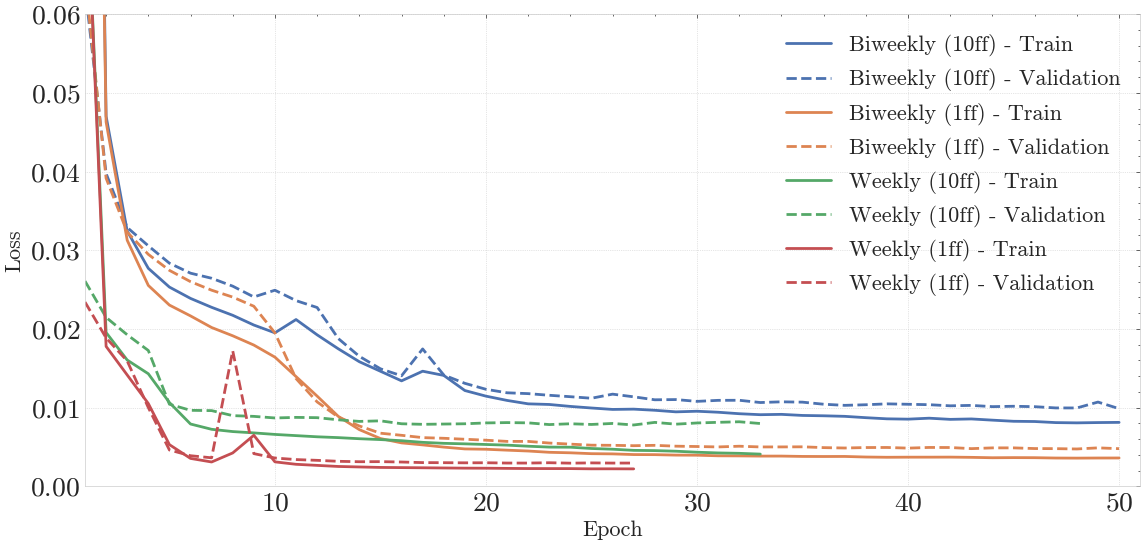

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scienceplots

# Style
sns.set_theme(style='whitegrid', context='talk', font_scale=1.2)
plt.style.use(['science', 'no-latex'])

# Load data
path = '/p/11207608-coclico/MSc_students/Daniel/Scripts/outputs/Results/Loss_scores.csv'
loss = pd.read_csv(path)

# Select columns
cols = ['Epoch',
    'hybrid_v14_30Epochs_case1_biweekly_10fut - Epoch Train Loss',
    'hybrid_v14_30Epochs_case1_biweekly_1fut - Epoch Train Loss',
    'hybrid_v14_30Epochs_case1_weekly_10fut - Epoch Train Loss',
    'hybrid_v14_30Epochs_case1_weekly_1fut - Epoch Train Loss',
    'hybrid_v14_30Epochs_case1_biweekly_10fut - Epoch Validation Loss',
    'hybrid_v14_30Epochs_case1_biweekly_1fut - Epoch Validation Loss',
    'hybrid_v14_30Epochs_case1_weekly_10fut - Epoch Validation Loss',
    'hybrid_v14_30Epochs_case1_weekly_1fut - Epoch Validation Loss'
]
loss = loss[cols]

# Rename for clarity
loss.columns = ['Epoch',
    'Biweekly (10ff) - Train', 'Biweekly (1ff) - Train',
    'Weekly (10ff) - Train', 'Weekly (1ff) - Train',
    'Biweekly (10ff) - Validation', 'Biweekly (1ff) - Validation',
    'Weekly (10ff) - Validation', 'Weekly (1ff) - Validation'
]

# Color palette and styles
palette = sns.color_palette("deep", 4)
linestyles = {'Train': '-', 'Validation': '--'}

# Plot
plt.figure(figsize=(12, 6))

for i, config in enumerate(['Biweekly (10ff)', 'Biweekly (1ff)', 'Weekly (10ff)', 'Weekly (1ff)']):
    for phase in ['Train', 'Validation']:
        label = f'{config} - {phase}'
        plt.plot(loss['Epoch'], loss[label],
                 label=label,
                 linestyle=linestyles[phase],
                 color=palette[i],
                 linewidth=2)

# Labels and styling
#plt.title('Training and Validation Loss over Epochs', fontsize=18)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.ylim(0, 0.06)
plt.xlim(1, 51)
plt.legend(loc='upper right', fontsize=16)
plt.grid(True, linestyle=':', linewidth=0.5)
plt.tight_layout()

# Show or save
plt.savefig('/p/11207608-coclico/MSc_students/Daniel/Scripts/outputs/Figures/Loss.png', dpi=300)


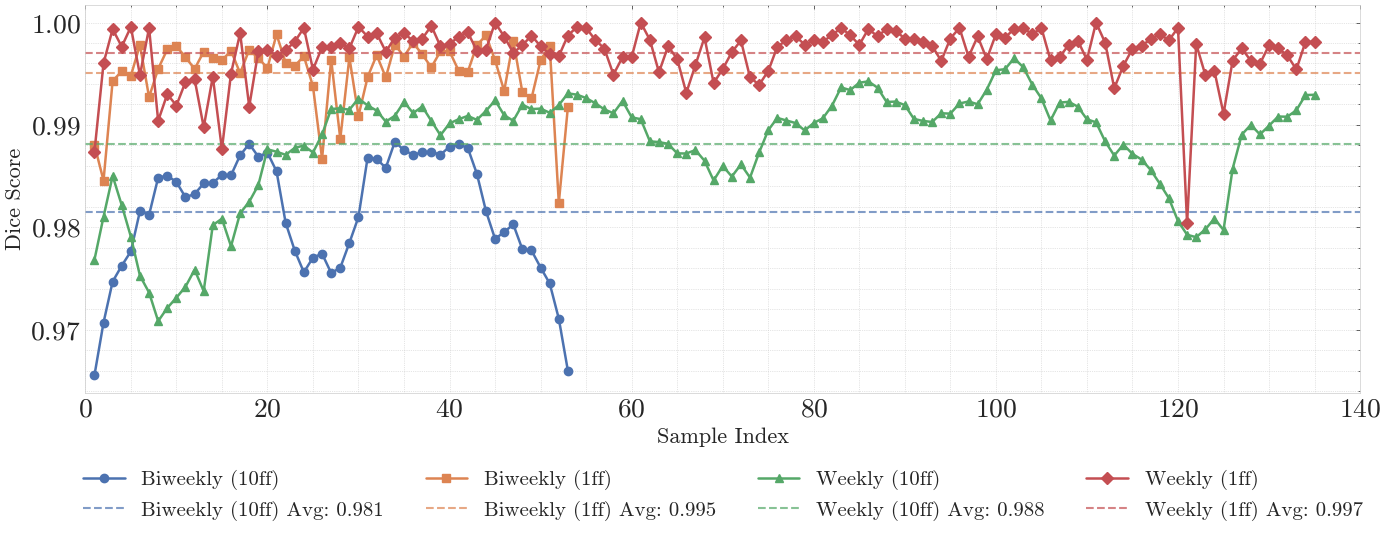

In [50]:


# Optional: use Seaborn theme for scientific plots
sns.set_theme(style='whitegrid', context='talk', font_scale=1.2)

# Load data
path = '/p/11207608-coclico/MSc_students/Daniel/Scripts/outputs/Results/Dice_Score_Buffer_Testing.csv'
dice_a = pd.read_csv(path)

# Select and rename columns
dice_a = dice_a[['Sample index Testing',
         'hybrid_v14_30Epochs_case1_biweekly_10fut - Dice_Score Buffer Testing',
         'hybrid_v14_30Epochs_case1_biweekly_1fut - Dice_Score Buffer Testing',
         'hybrid_v14_30Epochs_case1_weekly_10fut - Dice_Score Buffer Testing',
         'hybrid_v14_30Epochs_case1_weekly_1fut - Dice_Score Buffer Testing']]
dice_a.columns = ['Sample index Testing',
              'Biweekly (10ff)',
              'Biweekly (1ff)',
              'Weekly (10ff)',
              'Weekly (1ff)']
dice_a.set_index('Sample index Testing', inplace=True)

# Compute means
means = dice_a.mean()

# Define color palette and marker styles
palette = sns.color_palette("deep", n_colors=4)
markers = ['o', 's', '^', 'D']
linestyles = ['-', '-', '-', '-']

# Plot
plt.figure(figsize=(15, 6))
plt.style.use(['science', 'no-latex'])

for i, column in enumerate(dice_a.columns):
    plt.plot(dice_a.index, dice_a[column],
             label=column,
             marker=markers[i],
             linestyle=linestyles[i],
             color=palette[i],
             linewidth=1.8,
             markersize=6)
    plt.axhline(y=means[column],
                color=palette[i],
                linestyle='--',
                linewidth=1.5,
                alpha=0.7,
                label=f'{column} Avg: {means[column]:.3f}')

# Final styling
#plt.title('Dice Score vs Sample Index (Testing)', fontsize=18)
plt.xlabel('Sample Index', fontsize=16)
plt.ylabel('Dice Score', fontsize=16)
#plt.xticks(rotation=45)
plt.xlim(0, 140)
#plt.ylim(0.95, 1.0001)
plt.legend(loc='upper center',
           bbox_to_anchor=(0.5, -0.15),
           ncol=4,
           fontsize=15,
           frameon=False)

plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.tight_layout()


# Save or show
plt.savefig("/p/11207608-coclico/MSc_students/Daniel/Scripts/outputs/Figures/Dice_vs_sample.png", dpi=300)
plt.show()


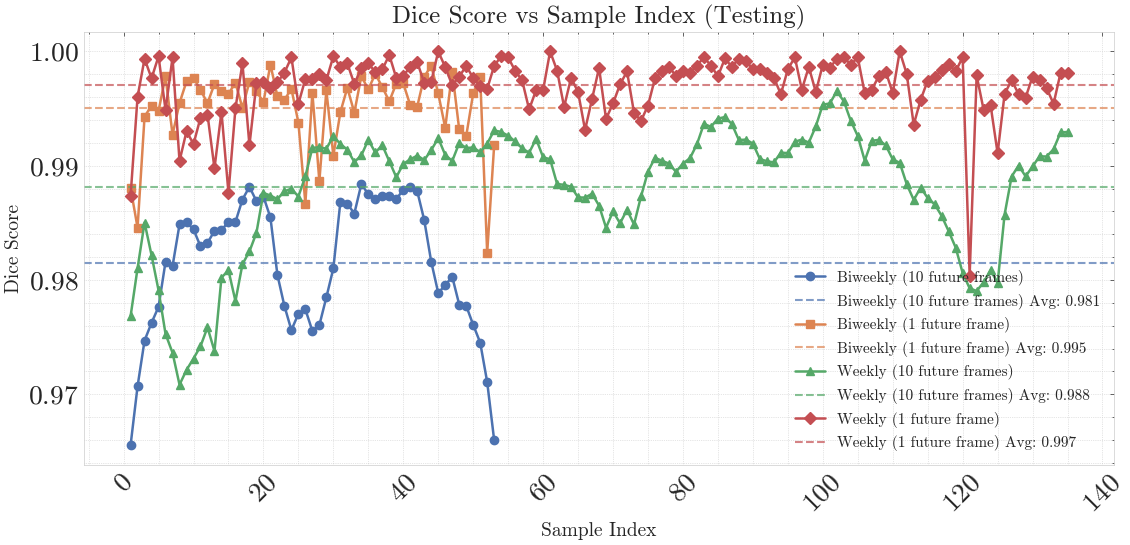

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scienceplots

# Optional: use Seaborn theme for scientific plots
sns.set_theme(style='whitegrid', context='talk', font_scale=1.2)

# Load data
path = '/p/11207608-coclico/MSc_students/Daniel/Scripts/outputs/Results/Dice_Score_Buffer_Testing.csv'
dice = pd.read_csv(path)

# Select and rename columns
dice = dice[['Sample index Testing',
         'hybrid_v14_30Epochs_case1_biweekly_10fut - Dice_Score Buffer Testing',
         'hybrid_v14_30Epochs_case1_biweekly_1fut - Dice_Score Buffer Testing',
         'hybrid_v14_30Epochs_case1_weekly_10fut - Dice_Score Buffer Testing',
         'hybrid_v14_30Epochs_case1_weekly_1fut - Dice_Score Buffer Testing']]
dice.columns = ['Sample index Testing',
              'Biweekly (10 future frames)',
              'Biweekly (1 future frame)',
              'Weekly (10 future frames)',
              'Weekly (1 future frame)']
dice.set_index('Sample index Testing', inplace=True)

# Compute means
means = dice.mean()

# Define color palette and marker styles
palette = sns.color_palette("deep", n_colors=4)
markers = ['o', 's', '^', 'D']
linestyles = ['-', '-', '-', '-']

# Plot
plt.figure(figsize=(15, 6))
plt.style.use(['science', 'no-latex'])

for i, column in enumerate(dice.columns):
    plt.plot(dice.index, dice[column],
             label=column,
             marker=markers[i],
             linestyle=linestyles[i],
             color=palette[i],
             linewidth=1.8,
             markersize=6)
    plt.axhline(y=means[column],
                color=palette[i],
                linestyle='--',
                linewidth=1.5,
                alpha=0.7,
                label=f'{column} Avg: {means[column]:.3f}')

# Final styling
plt.title('Dice Score vs Sample Index (Testing)', fontsize=18)
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Dice Score', fontsize=14)
plt.xlim(0, 140)
#plt.ylim(0.95, 1.0001)
plt.legend(loc='upper center',
           bbox_to_anchor=(0.5, -0.15),
           ncol=4,
           fontsize=15,
           frameon=False)

plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.tight_layout()


# Save or show
plt.savefig("/p/11207608-coclico/MSc_students/Daniel/Scripts/outputs/Figures/Dice_vs_sample.png", dpi=300)
plt.show()


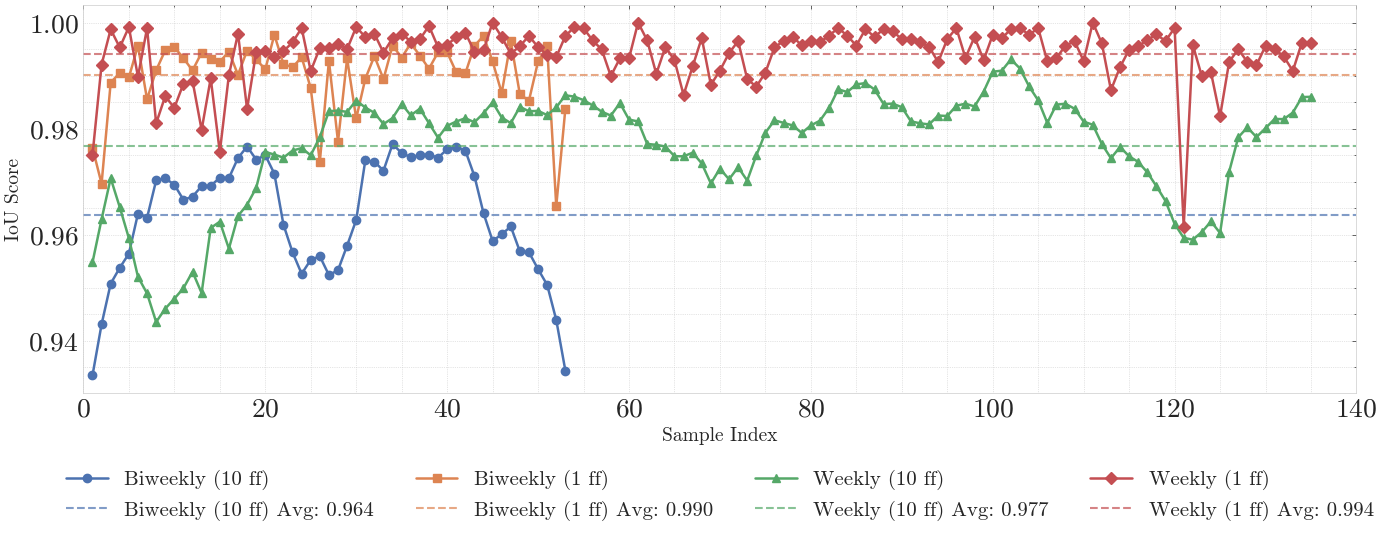

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scienceplots

# Optional: use Seaborn theme for scientific plots
sns.set_theme(style='whitegrid', context='talk', font_scale=1.2)

# Load data
path = '/p/11207608-coclico/MSc_students/Daniel/Scripts/outputs/Results/IoU_Score_Buffer_Testing.csv'
IoU = pd.read_csv(path)

# Select and rename columns
IoU = IoU[['Sample index Testing',
         'hybrid_v14_30Epochs_case1_biweekly_10fut - IOU_Score Testing',
         'hybrid_v14_30Epochs_case1_biweekly_1fut - IOU_Score Testing',
         'hybrid_v14_30Epochs_case1_weekly_10fut - IOU_Score Testing',
         'hybrid_v14_30Epochs_case1_weekly_1fut - IOU_Score Testing']]
IoU.columns = ['Sample index Testing',
              'Biweekly (10 ff)',
              'Biweekly (1 ff)',
              'Weekly (10 ff)',
              'Weekly (1 ff)']
IoU.set_index('Sample index Testing', inplace=True)

# Compute means
means = IoU.mean()

# Define color palette and marker styles
palette = sns.color_palette("deep", n_colors=4)
markers = ['o', 's', '^', 'D']
linestyles = ['-', '-', '-', '-']

# Plot
plt.figure(figsize=(15, 6))
plt.style.use(['science', 'no-latex'])

for i, column in enumerate(IoU.columns):
    plt.plot(IoU.index, IoU[column],
             label=column,
             marker=markers[i],
             linestyle=linestyles[i],
             color=palette[i],
             linewidth=1.8,
             markersize=6)
    plt.axhline(y=means[column],
                color=palette[i],
                linestyle='--',
                linewidth=1.5,
                alpha=0.7,
                label=f'{column} Avg: {means[column]:.3f}')

# Final styling
#plt.title('IoU Score vs Sample Index (Testing)', fontsize=18)
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('IoU Score', fontsize=14)
#plt.ylim(0.95, 1.0001)
plt.xlim(0, 140)
#plt.ylim(0.95, 1.0001)
plt.legend(loc='upper center',
           bbox_to_anchor=(0.5, -0.15),
           ncol=4,
           fontsize=15,
           frameon=False)

plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.tight_layout()

# Save or show
plt.savefig("/p/11207608-coclico/MSc_students/Daniel/Scripts/outputs/Figures/IoU.png", dpi=300)
plt.show()


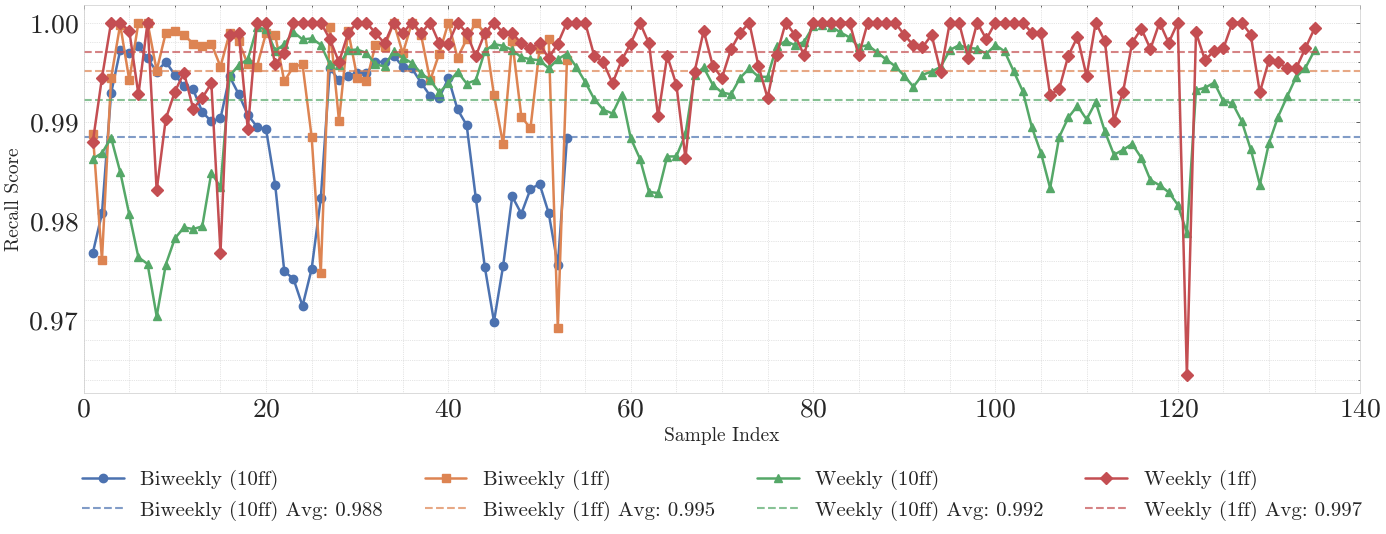

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scienceplots

# Optional: use Seaborn theme for scientific plots
sns.set_theme(style='whitegrid', context='talk', font_scale=1.2)

# Load data
path = '/p/11207608-coclico/MSc_students/Daniel/Scripts/outputs/Results/Recall_Score_Testing.csv'
Recall = pd.read_csv(path)

# Select and rename columns
Recall = Recall[['Sample index Testing',
         'hybrid_v14_30Epochs_case1_biweekly_10fut - Recall_Score Testing',
         'hybrid_v14_30Epochs_case1_biweekly_1fut - Recall_Score Testing',
         'hybrid_v14_30Epochs_case1_weekly_10fut - Recall_Score Testing',
         'hybrid_v14_30Epochs_case1_weekly_1fut - Recall_Score Testing']]
Recall.columns = ['Sample index Testing',
              'Biweekly (10ff)',
              'Biweekly (1ff)',
              'Weekly (10ff)',
              'Weekly (1ff)']
Recall.set_index('Sample index Testing', inplace=True)

# Compute means
means = Recall.mean()

# Define color palette and marker styles
palette = sns.color_palette("deep", n_colors=4)
markers = ['o', 's', '^', 'D']
linestyles = ['-', '-', '-', '-']

# Plot
plt.figure(figsize=(15, 6))
plt.style.use(['science', 'no-latex'])

for i, column in enumerate(Recall.columns):
    plt.plot(Recall.index, Recall[column],
             label=column,
             marker=markers[i],
             linestyle=linestyles[i],
             color=palette[i],
             linewidth=1.8,
             markersize=6)
    plt.axhline(y=means[column],
                color=palette[i],
                linestyle='--',
                linewidth=1.5,
                alpha=0.7,
                label=f'{column} Avg: {means[column]:.3f}')

# Final styling
#plt.title('Recall Score vs Sample Index (Testing)', fontsize=18)
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Recall Score', fontsize=14)
plt.xlim(0, 140)
#plt.ylim(0.95, 1.0001)
plt.legend(loc='upper center',
           bbox_to_anchor=(0.5, -0.15),
           ncol=4,
           fontsize=15,
           frameon=False)

plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.tight_layout()

# Save or show
plt.savefig("/p/11207608-coclico/MSc_students/Daniel/Scripts/outputs/Figures/Recall.png", dpi=300)
plt.show()


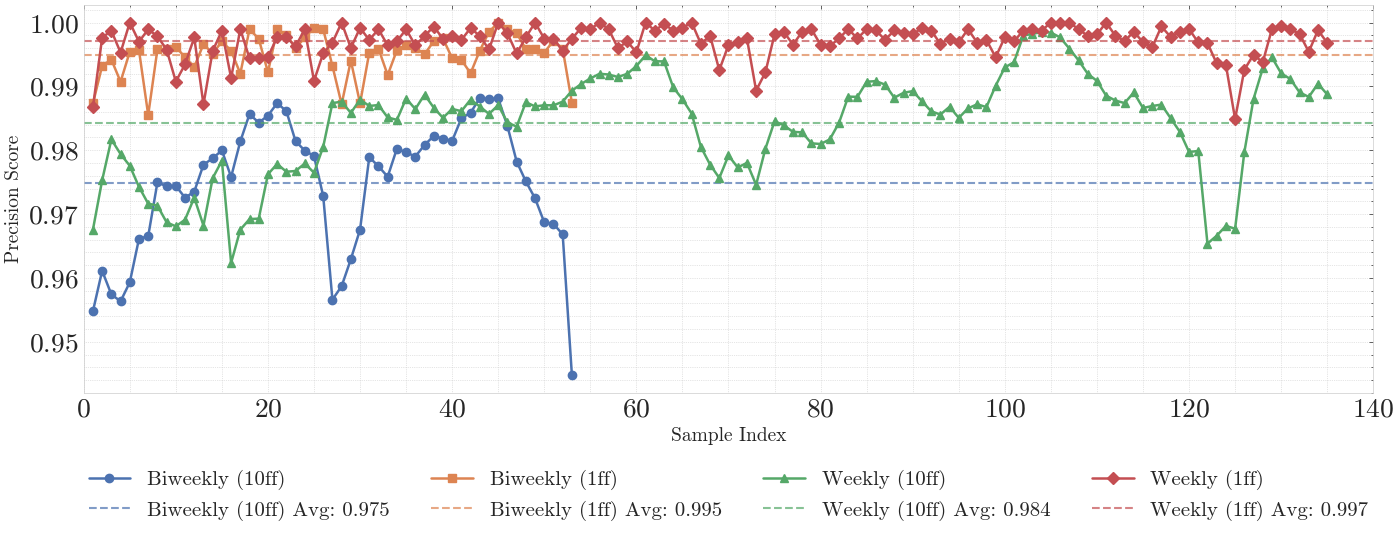

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scienceplots

# Optional: use Seaborn theme for scientific plots
sns.set_theme(style='whitegrid', context='talk', font_scale=1.2)

# Load data
path = '/p/11207608-coclico/MSc_students/Daniel/Scripts/outputs/Results/Precision_Score_Testing.csv'
Precision = pd.read_csv(path)

# Select and rename columns
Precision = Precision[['Sample index Testing',
         'hybrid_v14_30Epochs_case1_biweekly_10fut - Precision_Score Testing',
         'hybrid_v14_30Epochs_case1_biweekly_1fut - Precision_Score Testing',
         'hybrid_v14_30Epochs_case1_weekly_10fut - Precision_Score Testing',
         'hybrid_v14_30Epochs_case1_weekly_1fut - Precision_Score Testing']]
Precision.columns = ['Sample index Testing',
              'Biweekly (10ff)',
              'Biweekly (1ff)',
              'Weekly (10ff)',
              'Weekly (1ff)']
Precision.set_index('Sample index Testing', inplace=True)

# Compute means
means = Precision.mean()

# Define color palette and marker styles
palette = sns.color_palette("deep", n_colors=4)
markers = ['o', 's', '^', 'D']
linestyles = ['-', '-', '-', '-']

# Plot
plt.figure(figsize=(15, 6))
plt.style.use(['science', 'no-latex'])

for i, column in enumerate(Precision.columns):
    plt.plot(Precision.index, Precision[column],
             label=column,
             marker=markers[i],
             linestyle=linestyles[i],
             color=palette[i],
             linewidth=1.8,
             markersize=6)
    plt.axhline(y=means[column],
                color=palette[i],
                linestyle='--',
                linewidth=1.5,
                alpha=0.7,
                label=f'{column} Avg: {means[column]:.3f}')

# Final styling
#plt.title('Precision Score vs Sample Index (Testing)', fontsize=18)
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Precision Score', fontsize=14)
plt.xlim(0, 140)
plt.legend(loc='upper center',
           bbox_to_anchor=(0.5, -0.15),
           ncol=4,
           fontsize=15,
           frameon=False)

plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.tight_layout()

# Save or show
plt.savefig("/p/11207608-coclico/MSc_students/Daniel/Scripts/outputs/Figures/Precision.png", dpi=300)
plt.show()


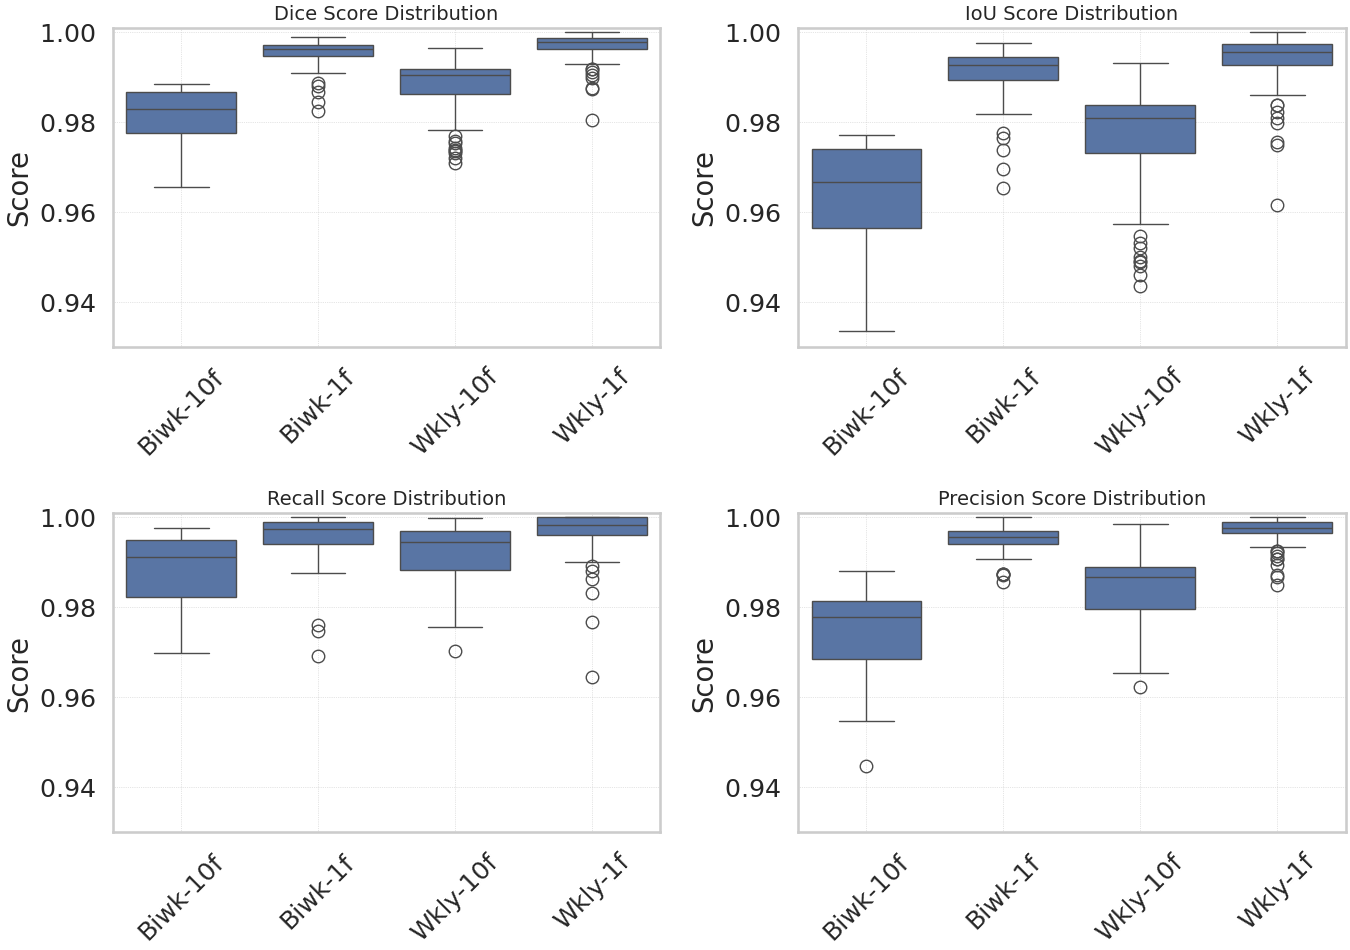

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Melt each metric into long format
dice_long = dice.reset_index().melt(id_vars='Sample index Testing', var_name='Model', value_name='Score')
dice_long['Metric'] = 'Dice'

iou_long = IoU.reset_index().melt(id_vars='Sample index Testing', var_name='Model', value_name='Score')
iou_long['Metric'] = 'IoU'

recall_long = Recall.reset_index().melt(id_vars='Sample index Testing', var_name='Model', value_name='Score')
recall_long['Metric'] = 'Recall'

precision_long = Precision.reset_index().melt(id_vars='Sample index Testing', var_name='Model', value_name='Score')
precision_long['Metric'] = 'Precision'

# Grouped into a dictionary for easier plotting
metrics_data = {
    'Dice': dice_long,
    'IoU': iou_long,
    'Recall': recall_long,
    'Precision': precision_long
}

# Shorten model names in all dataframes
short_model_names = {
    'Biweekly (10 future frames)': 'Biwk-10f',
    'Biweekly (1 future frame)': 'Biwk-1f',
    'Weekly (10 future frames)': 'Wkly-10f',
    'Weekly (1 future frame)': 'Wkly-1f'
}

for df in [dice_long, iou_long, recall_long, precision_long]:
    df['Model'] = df['Model'].map(short_model_names)

# Plot setup
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
plt.style.use(['science', 'no-latex'])
axes = axes.flatten()
sns.set_theme(style='whitegrid', context='talk', font_scale=1.1)

# Loop through metrics and plot on each subplot
for i, (metric_name, df_metric) in enumerate(metrics_data.items()):
    ax = axes[i]
    sns.boxplot(data=df_metric, x='Model', y='Score', ax=ax)
    ax.set_title(f"{metric_name} Score Distribution", fontsize=14)
    ax.set_xlabel("")
    ax.set_ylabel("Score")
    ax.set_ylim(0.93, 1.001)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle=':', linewidth=0.5)

plt.tight_layout()
plt.show()


                t=1  t=2  t=3  t=4  t=5  t=6  t=7  t=8  t=9  t=10
Metric                                                           
Dice_Avg   0.998828  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN
Dice       0.995028  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN
IOU        0.990129  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN
Precision  0.994965  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN
Recall     0.995119  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN


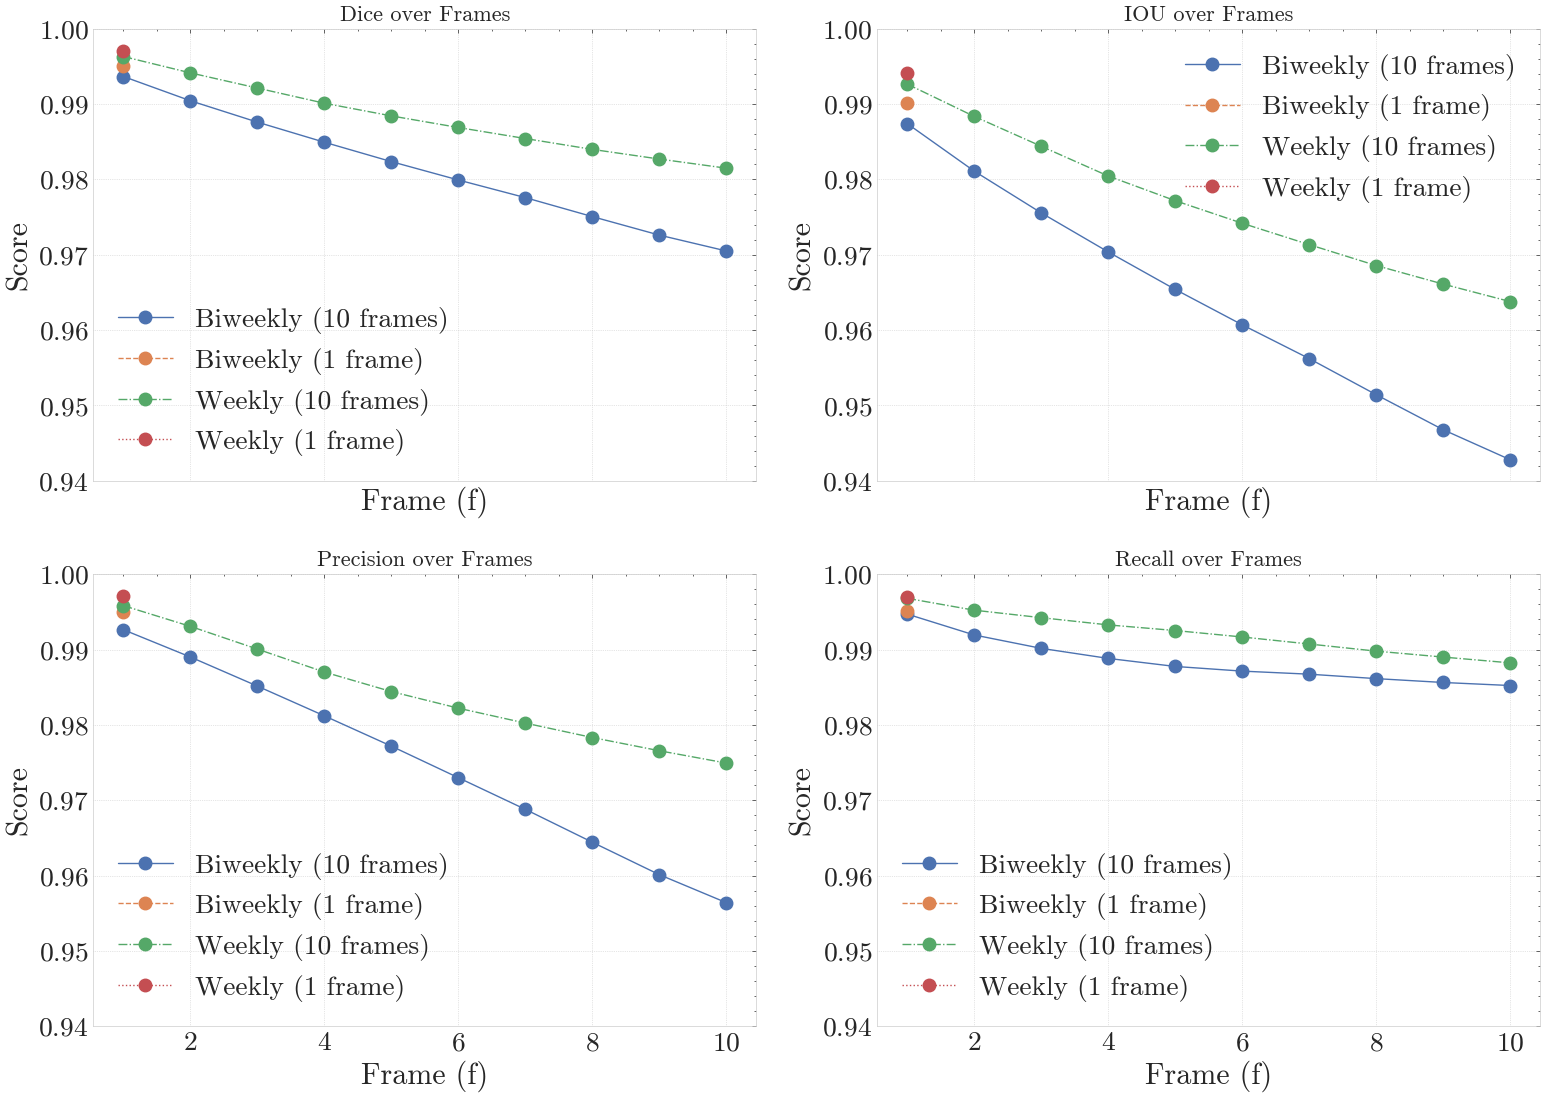

In [59]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style='whitegrid', context='talk', font_scale=1.2)
plt.style.use(['science', 'no-latex'])

# Load data
path = '/p/11207608-coclico/MSc_students/Daniel/Scripts/outputs/Results/Avg_metrics_per_frame_test.csv'
df = pd.read_csv(path)

# The data has repeated blocks for each model separated by nulls
# There are 5 metrics, 10 time points each, 4 models stacked vertically

# Number of metrics per model (5)
metrics_per_model = 5
time_points = 10
models = ['Biweekly (10 frames)', 'Biweekly (1 frame)', 'Weekly (10 frames)', 'Weekly (1 frame)']

# Split the dataframe into 4 blocks for each model
dfs = []
start = 0
for i in range(4):
    block = df.iloc[start:start+metrics_per_model, 1:].copy()
    block.index = df.iloc[start:start+metrics_per_model, 0]  # metric names
    block.columns = [f't={i+1}' for i in range(time_points)]
    dfs.append(block)
    start += metrics_per_model   # skip the null row

# Now dfs[i] is a DataFrame with metrics x time for model i


# Prepare plot
fig, axs = plt.subplots(2, 2, figsize=(16, 12), sharex=True)
axs = axs.flatten()

colors = sns.color_palette('deep', n_colors=4)
linestyles = ['-', '--', '-.', ':']

# # Rename metrics for clarity
dfs = [df.rename(index={
    'Dice': 'Dice_Avg',
    'Dice Buffer': 'Dice',
    'IOU': 'IOU', 
    'Precision': 'Precision',
    'Recall': 'Recall'
}) for df in dfs]

print(dfs[1])  # Print first model's DataFrame to check
# Metrics to plot
metrics = ['Dice_Avg', 'Dice', 'IOU', 'Precision', 'Recall']

# We'll plot 4 metrics in subplots, let's skip 'Dice Buffer' or combine Recall and Dice Buffer somehow
# Let's plot Dice, IOU, Precision, Recall (the 4 you used previously)

metrics_to_plot = ['Dice', 'IOU', 'Precision', 'Recall']

for i, metric in enumerate(metrics_to_plot):
    ax = axs[i]
    for j, model_df in enumerate(dfs):
        if metric in model_df.index:
            ax.plot(
                range(1, time_points + 1),
                model_df.loc[metric].values,
                label=models[j],
                color=colors[j],
                linestyle=linestyles[j],
                marker='o'
            )
    ax.set_title(f"{metric} over Frames", fontsize=16)
    ax.set_xlabel("Frame (f)")
    ax.set_ylabel("Score")
    ax.set_ylim(0.94, 1)
    ax.grid(True, linestyle=':')
    ax.legend()

#plt.suptitle("Evolution of Evaluation Metrics Over Time by Model", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


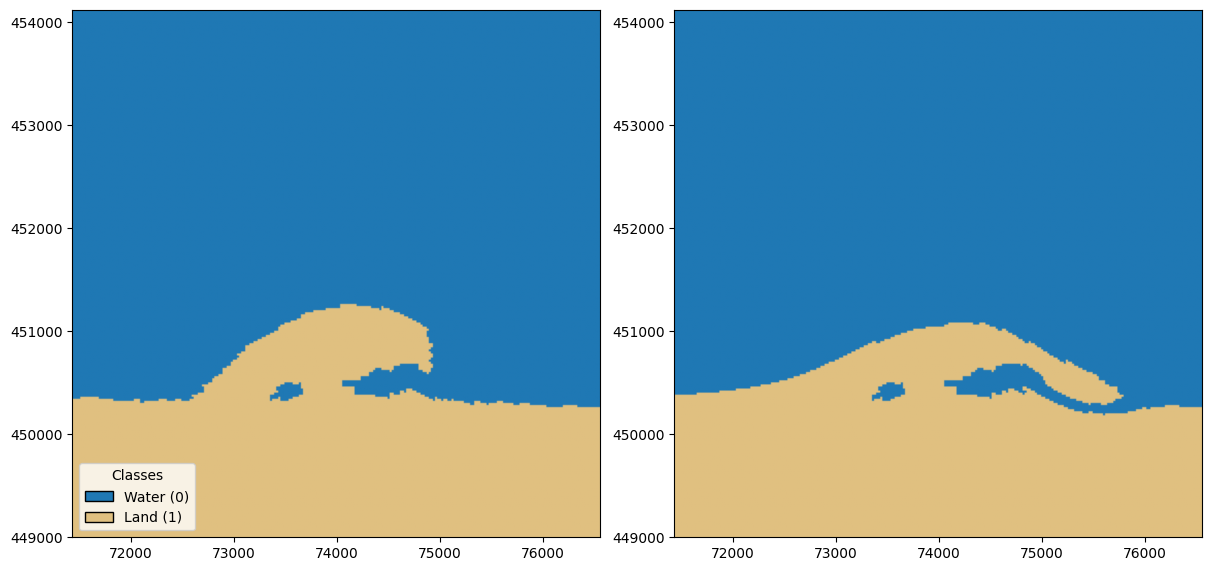

In [43]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from matplotlib.colors import ListedColormap

# Define path
path = '/p/11207608-coclico/MSc_students/Daniel/Scripts/outputs/zm_fromBart_v0_1/bi-monthly/testing/'

# Compile regex to extract numbers from filenames
pattern = re.compile(r"binary_mask(\d+)\.tif")

# Get all .tif files and sort by number in filename
files = [
    f for f in os.listdir(path) if f.endswith(".tif") and pattern.match(f)
]
files_sorted = sorted(files, key=lambda x: int(pattern.search(x).group(1)))

# Define cropping bounds
#ymin, ymax = 50, 120
#xmin, xmax = 0, 512

# Create colormap: 0 → water (blue), 1 → land (yellow brown)
custom_cmap = ListedColormap(["#1f78b4", "#e0c080"])

# Load and crop images
images = []
for file in files_sorted:
    with rasterio.open(os.path.join(path, file)) as src:
        img = src.read(1)
        binary = (img > 0.5).astype(np.uint8)  # Threshold
        transform = src.transform
        #cropped = binary[ymin:ymax, xmin:xmax]
        crs = src.crs
        images.append(binary)

# Plot
# fig, axs = plt.subplots(len(images), 1, figsize=(6, len(images) * 2), constrained_layout=True)

# if len(images) == 1:
#     axs = [axs]

# for i, (img, ax) in enumerate(zip(images, axs)):
#     ax.imshow(img, cmap=custom_cmap, interpolation='none', origin='lower')
#     ax.set_title(f"Frame {pattern.search(files_sorted[i]).group(1)} Index {i}", fontsize=10)
#     ax.axis("off")

# plt.show()

# Plot the first and the last image with titles
from rasterio.plot import show
from matplotlib.patches import Patch

fig, axs = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)

show(images[0], transform=transform, ax=axs[0], cmap=custom_cmap, origin='lower')
#axs[0].set_title("First Frame")


show(images[-1], transform=transform, ax=axs[1], cmap=custom_cmap, origin='lower')
#axs[1].set_title("Last Frame")

legend_elements = [
    Patch(facecolor=custom_cmap(0), edgecolor='black', label='Water (0)'),
    Patch(facecolor=custom_cmap(1), edgecolor='black', label='Land (1)')
]

# Add legend to the first subplot
axs[0].legend(handles=legend_elements, title="Classes", loc='lower left')

plt.savefig('/p/11207608-coclico/MSc_students/Daniel/Scripts/outputs/Figures/Binary_masks.png', dpi=300)
plt.show()




In [17]:
import os
import netCDF4
import numpy as np
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import netCDF4 
import h5py 
import os
from pyproj import Transformer
import geopandas as gpd
import pandas as pd
import contextily as ctx
import rasterio
from rasterio.transform import from_origin, Affine
from scipy.interpolate import griddata
from shapely.geometry import Polygon, Point
from shapely.affinity import rotate
from affine import Affine
import math

# Final Script to process the data and create the rasters

# Function to load one file
def load_file(file):
    dataset = netCDF4.Dataset(file, 'r')

    result = {
        'x': dataset.variables['mesh2d_face_x'][:],
        'y': dataset.variables['mesh2d_face_y'][:],
        'bed_level': dataset.variables['mesh2d_mor_bl'][:],
        'Hs': dataset.variables['mesh2d_hwav'][:],
        'dir': dataset.variables['mesh2d_thetamean'][:],
        'per': dataset.variables['mesh2d_twav'][:],
        'time': dataset.variables['time'][:],
        'timestep': dataset.variables['timestep'][:]
    }

    dataset.close()
    return result


# === Rotate coordinates around initial_corner ===
def rotate_coords(x, y, center, angle_deg):
    angle_rad = np.radians(angle_deg)
    x_shifted = x - center[0]
    y_shifted = y - center[1]
    x_rot = x_shifted * np.cos(angle_rad) - y_shifted * np.sin(angle_rad)
    y_rot = x_shifted * np.sin(angle_rad) + y_shifted * np.cos(angle_rad)
    return x_rot + center[0], y_rot + center[1]
# Iterate over all folder names

# Set the working directory to the output folder
output_f=r"/p/11207608-coclico/MSc_students/Daniel/Delfland/Final_Runs/zm_fromBart_v0_1/dflowfm/output/"

#check if some process was already done
output_folder =r"/p/11207608-coclico/MSc_students/Daniel/Scripts/outputs/test/"

output_dir = output_f

print(f"Found folder: {output_dir}")
# Change to the output directory
os.chdir(output_dir)


# Filter and sort file names
files = sorted([f for f in os.listdir() if "map" in f])
print(f"Found {len(files)} files in {output_dir}")

# Run in parallel with threads
results = []
with ThreadPoolExecutor(max_workers=8) as executor:  # adjust number of workers if needed
    for res in tqdm(executor.map(load_file, files), total=len(files)):
        results.append(res)

# Concatenate after loading all
x_combine = np.concatenate([r['x'] for r in results], axis=0)
y_combine = np.concatenate([r['y'] for r in results], axis=0)
bed_level_combine = np.concatenate([r['bed_level'] for r in results], axis=1)
Hs_combine = np.concatenate([r['Hs'] for r in results], axis=1)
dir_combine = np.concatenate([r['dir'] for r in results], axis=1)
per_combine = np.concatenate([r['per'] for r in results], axis=1)
time_combine = np.concatenate([r['time'] for r in results], axis=0)
timestep_combine = np.concatenate([r['timestep'] for r in results], axis=0)

time = ['weekly', 'bi-monthly', 'monthly']  # Choose the time resolution you want to process
output_freq = 2 # Frequency of output data in hours
last = 5256 # 5256 5406 Last timestep to process in hours
final = last // output_freq


    




Found folder: /p/11207608-coclico/MSc_students/Daniel/Delfland/Final_Runs/zm_fromBart_v0_1/dflowfm/output/
Found 16 files in /p/11207608-coclico/MSc_students/Daniel/Delfland/Final_Runs/zm_fromBart_v0_1/dflowfm/output/


100%|██████████| 16/16 [26:14<00:00, 98.42s/it]  


Closest index: 2967


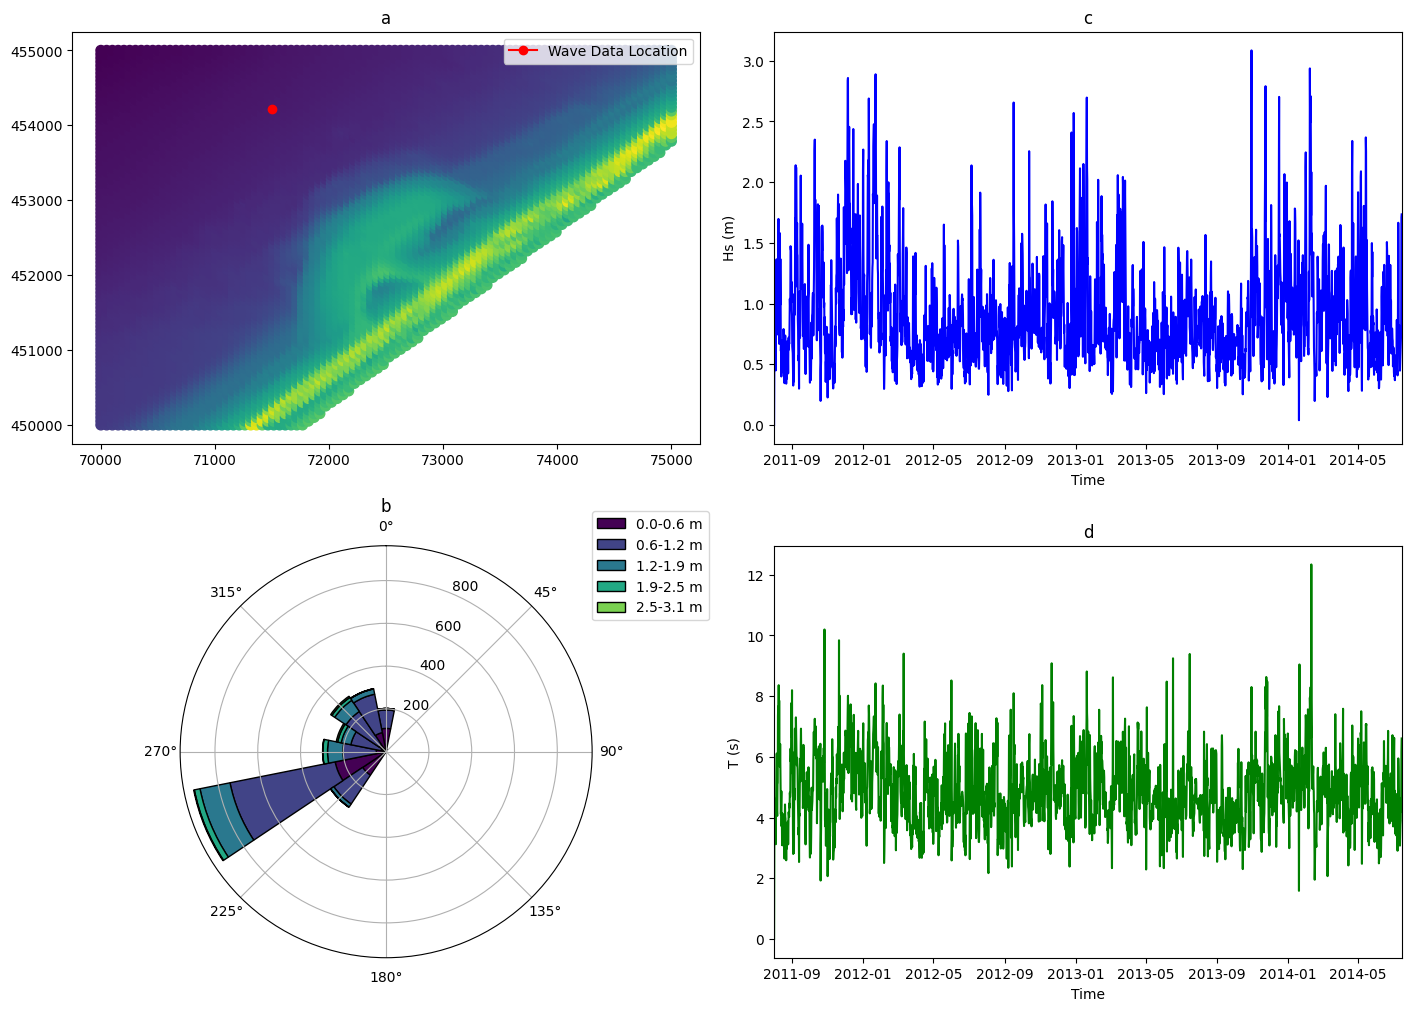

In [77]:
# Select a specific coordinate to extract time series data
import datetime

grid_x, grid_y = np.mgrid[70000:75000:100j, 450000:455000:100j]
bed_level_grid = griddata((x_combine, y_combine), bed_level_combine[0,:], (grid_x, grid_y), method='linear')

frame =72
x_coord = 71500
y_coord = 454222
x_coord1 = 74000
y_coord1 = 453500
# Find the index of the closest point to the specified coordinate

distances = np.sqrt((x_combine - x_coord) ** 2 + (y_combine - y_coord) ** 2)
closest_index = np.argmin(distances)
print(f"Closest index: {closest_index}")

# number of images extracted
n = math.ceil((last/output_freq) // frame)
n = n*frame

# Extract time series data for the closest point
Hs = Hs_combine[:n, closest_index]
dir = dir_combine[:n, closest_index]
per = per_combine[:n, closest_index]

start_time = datetime.datetime(2011, 8, 1)
time = [start_time + datetime.timedelta(hours=10 * i) for i in range(len(Hs))]

df = pd.DataFrame({
            'Datetime': time,
            'Hs': Hs,
            'Direction': dir,
            'Period': per
        })

# Create a DataFrame for the time series data   
import matplotlib.pyplot as plt
from rasterio.plot import show
from matplotlib.patches import Patch
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import math


# --- Subplot configuration ---
fig, axs = plt.subplots(2, 2, figsize=(14, 10), constrained_layout=True)

# ------------------------
# (1,1) First image with location point
# ------------------------
axs[0, 0].set_title("a")

# Plot the selected coordinate point
axs[0, 0].scatter(grid_x, grid_y, c=bed_level_grid, cmap='viridis', s=50)
axs[0, 0].plot(x_coord, y_coord, marker='o', color='red', markersize=6, label='Wave Data Location')
axs[0, 0].legend(loc='upper right')

# ------------------------
# (2,1) Wave Rose (Direction vs Hs)
# ------------------------
ax_rose = axs[1, 0]
theta = np.deg2rad(dir)  # Convert degrees to radians
r = Hs

# Create bins for direction and Hs
n_bins_dir = 16
n_bins_hs = 5
dir_bins = np.linspace(0, 2 * np.pi, n_bins_dir + 1)
hs_bins = np.linspace(0, np.nanmax(Hs), n_bins_hs + 1)

# Create histogram
hist, _, _ = np.histogram2d(theta, Hs, bins=[dir_bins, hs_bins])

# Normalize for better visual if needed
hist = hist.T  # Transpose for correct orientation

# Plot wave rose as a stacked bar polar plot
axs[1, 0].remove() 
ax_rose = plt.subplot(2, 2, 3, polar=True)
for i in range(n_bins_hs):
    radii = hist[i]
    width = (2 * np.pi) / n_bins_dir
    bars = ax_rose.bar(dir_bins[:-1], radii, width=width, bottom=np.sum(hist[:i], axis=0),
                       color=cm.viridis(i / n_bins_hs), edgecolor='black', label=f'{hs_bins[i]:.1f}-{hs_bins[i+1]:.1f} m')

ax_rose.set_theta_zero_location("N")
ax_rose.set_theta_direction(-1)
ax_rose.set_title("b")
ax_rose.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# ------------------------
# (1,2) Hs Time Series
# ------------------------
axs[0, 1].plot(df['Datetime'], df['Hs'], color='blue')
axs[0, 1].set_title("c")
axs[0, 1].set_ylabel("Hs (m)")
axs[0, 1].set_xlabel("Time")
axs[0, 1].set_xlim(df['Datetime'].min(), df['Datetime'].max())

# ------------------------
# (2,2) Period Time Series
# ------------------------
axs[1, 1].plot(df['Datetime'], df['Period'], color='green')
axs[1, 1].set_title("d")
axs[1, 1].set_ylabel("T (s)")
axs[1, 1].set_xlabel("Time")
axs[1, 1].set_xlim(df['Datetime'].min(), df['Datetime'].max())

#plt.suptitle("Wave Climate Overview at Selected Point", fontsize=16)
plt.savefig('/p/11207608-coclico/MSc_students/Daniel/Scripts/outputs/Figures/Wave_forcing_sum.png', dpi=300)
plt.show()




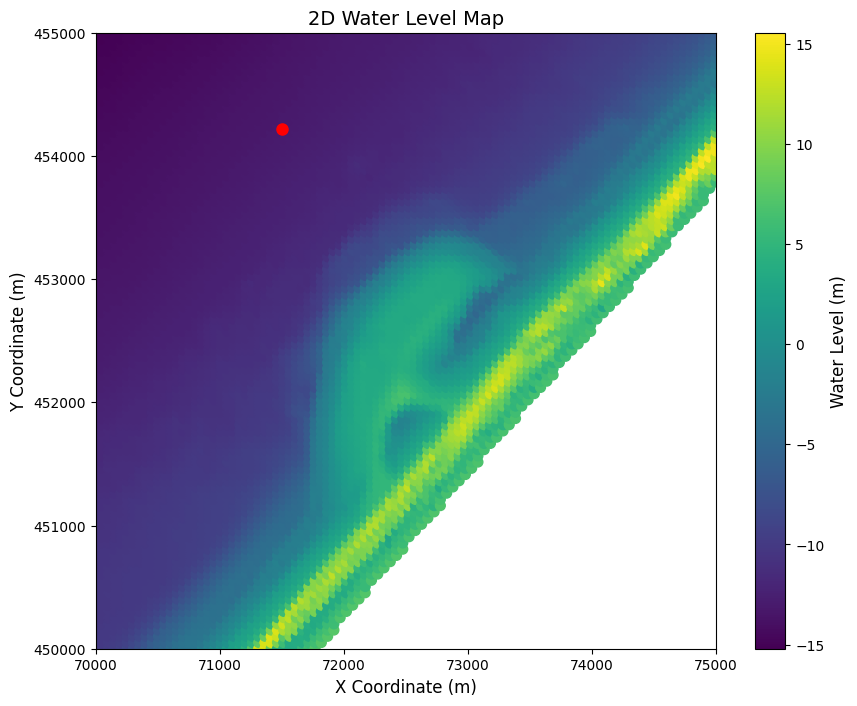

In [72]:
# Create a scatter plot
# create a interpolated grid for the bed level
grid_x, grid_y = np.mgrid[70000:75000:100j, 450000:455000:100j]
bed_level_grid = griddata((x_combine, y_combine), bed_level_combine[0,:], (grid_x, grid_y), method='linear')
# Plot the interpolated grid


plt.figure(figsize=(10, 8))
scatter = plt.scatter(grid_x, grid_y, c=bed_level_grid, cmap='viridis', s=50)
plt.plot(x_coord, y_coord, 'ro', markersize=8, label='Selected Point')

# Add a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Water Level (m)', fontsize=12)

# Add labels and title
plt.xlabel('X Coordinate (m)', fontsize=12)
plt.ylabel('Y Coordinate (m)', fontsize=12)
plt.title('2D Water Level Map', fontsize=14)
plt.xlim(70000, 75000)
plt.ylim(450000, 455000)

# Show the plot
plt.show()

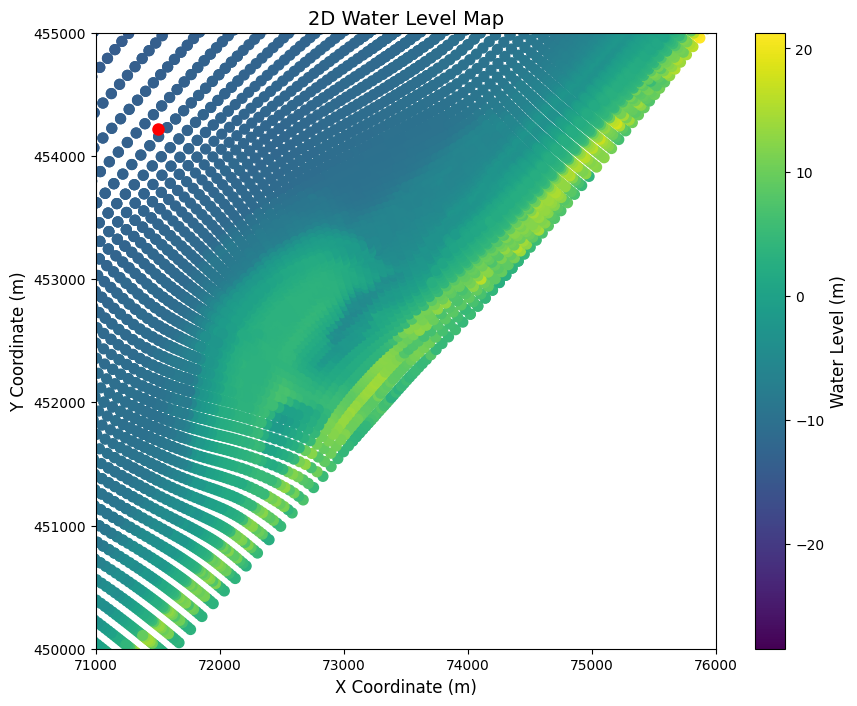

In [ ]:
# Create a scatter plot
# create a interpolated grid for the bed level

plt.figure(figsize=(10, 8))
scatter = plt.scatter(x_combine, y_combine, c=bed_level_combine[0,:], cmap='viridis', s=50)
plt.plot(x_coord, y_coord, 'ro', markersize=8, label='Selected Point')

# Add a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Water Level (m)', fontsize=12)

# Add labels and title
plt.xlabel('X Coordinate (m)', fontsize=12)
plt.ylabel('Y Coordinate (m)', fontsize=12)
plt.title('2D Water Level Map', fontsize=14)
plt.xlim(71000, 76000)
plt.ylim(450000, 455000)

# Show the plot
plt.show()

(9805, 6030)


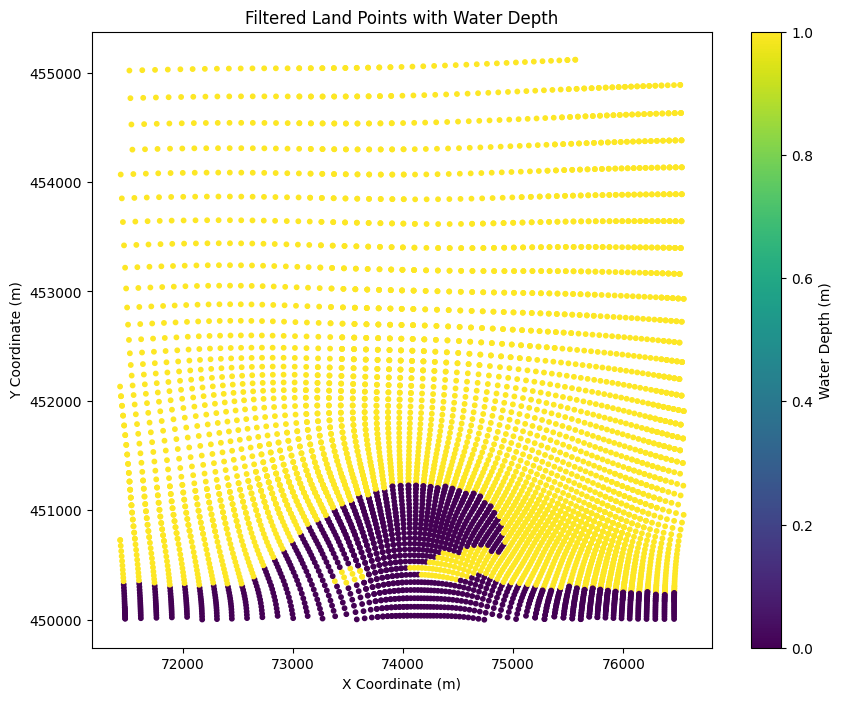

(6030,)
Zero values: 0
(256, 256)


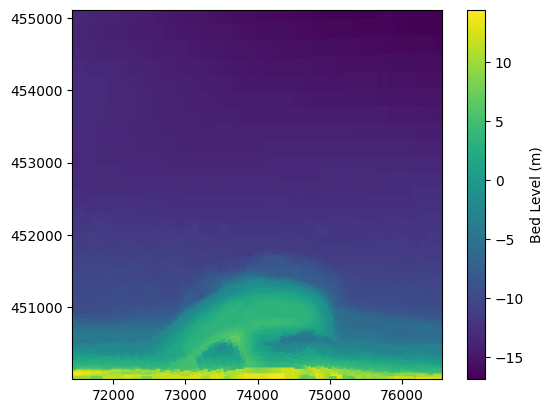

In [30]:
time = ['weekly', 'bi-monthly', 'monthly']  # Choose the time resolution you want to process
output_freq = 2 # Frequency of output data in hours
last = 5256 # 5256 5406 Last timestep to process in hours
final = last // output_freq


time_dict = {
    #'daily': 4,
    'weekly': 34,
    'bi-monthly': 72,
    'monthly': 144,
}

#divide time_dict by output_freq
for key in time_dict.keys():
    time_dict[key] = time_dict[key] // output_freq


# Define geometry

# Step 1: Define the rectangle parameters
initial_corner = (71430, 450000)  # Bottom-left corner (EPSG:28992)
width, height = 5120, 5120  # Rectangle dimensions in meters
angle = 49  # Rotation angle in degrees
resolution = 20  # Resolution in meters per pixel

# Step 2: Compute the four corners of the rectangle
corners = np.array([
    [0, 0],       # Bottom-left
    [width, 0],   # Bottom-right
    [width, height],  # Top-right
    [0, height]   # Top-left
]) + initial_corner  # Translate to initial position

# Step 3: Rotate the rectangle
angle_rad = np.radians(angle)
rotation_matrix = np.array([
    [np.cos(angle_rad), -np.sin(angle_rad)],
    [np.sin(angle_rad), np.cos(angle_rad)]
])

rotated_corners = (rotation_matrix @ (corners - initial_corner).T).T + initial_corner
polygon = Polygon(rotated_corners)

# Step 4: Create a GeoDataFrame with the rectangle
gdf = gpd.GeoDataFrame(geometry=[polygon], crs="EPSG:28992")

# Step 5: Convert x_combine and y_combine into a GeoDataFrame
points = gpd.GeoDataFrame(geometry=[Point(x, y) for x, y in zip(x_combine, y_combine)], crs="EPSG:28992")

# Step 6: Filter points inside the rotated rectangle
mask = points.within(polygon)
x_combine_filtered = x_combine[mask]
y_combine_filtered = y_combine[mask]
bed_level_combine_filtered = bed_level_combine[:, mask]
print(bed_level_combine_filtered.shape)

x_rot, y_rot = rotate_coords(x_combine_filtered, y_combine_filtered, initial_corner, -angle)


# Define bounds of the raster using min/max of rotated coordinates
xmin, xmax = min(x_rot), max(x_rot)
ymin, ymax = min(y_rot), max(y_rot)

ymin = ymin   # Adjust ymin to include the shifted y-coordinates
ymax = ymax   # Adjust ymax to include the shifted y-coordinates

# Create grid coordinates
grid_x, grid_y = np.meshgrid(
    np.linspace(xmin, xmax, width // resolution, endpoint=False),  # Keep correct number of points
    np.linspace(ymin, ymax, height // resolution, endpoint=False)
)

# Compute mean water depth at each point
bed_level = bed_level_combine_filtered[0, :]
bed_level2 = bed_level <= 0

#plot points
plt.figure(figsize=(10, 8))
plt.scatter(x_rot, y_rot, c=bed_level2, cmap='viridis', s=10)
plt.colorbar(label='Water Depth (m)')
plt.xlabel('X Coordinate (m)')
plt.ylabel('Y Coordinate (m)')
plt.title('Filtered Land Points with Water Depth')
plt.show()

print(bed_level.shape)

# Create a mask for original zero values
mask_zero = (bed_level == 0)
print(f"Zero values: {mask_zero.sum()}")

# Interpolate only nonzero values
grid_z = griddata(
    (x_rot[~mask_zero], y_rot[~mask_zero]),  # Exclude zero-depth points
    bed_level[~mask_zero],            # Use only nonzero values
    (grid_x, grid_y),
    method='nearest'  # Can use 'nearest' for strict zero preservation
)

# Replace NaN with 0 to avoid gaps
grid_z[np.isnan(grid_z)] = 0

# **Fix: Identify zero values in the interpolated grid**
grid_mask = griddata(
    (x_rot, y_rot), 
    mask_zero.astype(int),  # Convert mask to integer for interpolation
    (grid_x, grid_y), 
    method='nearest'  # Ensure mask correctly follows original data
)

# Ensure all originally zero values remain 0
grid_z[grid_mask == 1] = 0  

print(grid_z.shape)

# Define raster transform (top-left corner, resolution, and pixel size)
transform = from_origin(xmin, ymax, resolution, resolution)

# Save raster as GeoTIFF
output_raster = "/p/11207608-coclico/MSc_students/Daniel/Scripts/outputs/Figures/water_depth_raster.tif"

with rasterio.open(
    output_raster, "w",
    driver="GTiff",
    height=grid_z.shape[0],
    width=grid_z.shape[1],
    count=1,
    dtype=grid_z.dtype,
    crs="EPSG:28992",
    transform=transform
) as dst:
    dst.write(grid_z, 1)

# Plot raster
plt.imshow(grid_z, extent=[xmin, xmax, ymin, ymax], origin="lower", cmap="viridis")
plt.colorbar(label="Bed Level (m)")
#plt.title("Interpolated Water Depth Raster")
plt.savefig("/p/11207608-coclico/MSc_students/Daniel/Scripts/outputs/Figures/raster.png", dpi=300)
plt.show()


(9805, 6030)


/tmp/ipykernel_2606543/3680192980.py:43: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


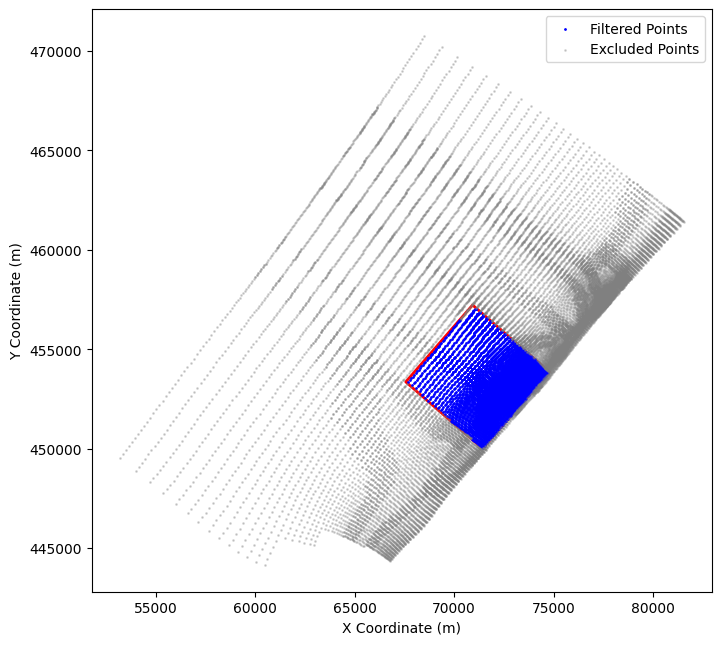

Original points: 24734, Filtered points: 6030


In [23]:

# Step 1: Define the rectangle parameters
initial_corner = (71430, 450000)  # Bottom-left corner (EPSG:28992)
width, height = 5120, 5120  # Rectangle dimensions in meters
angle = 49  # Rotation angle in degrees

# Step 2: Compute the four corners of the rectangle
corners = np.array([
    [0, 0],       # Bottom-left
    [width, 0],   # Bottom-right
    [width, height],  # Top-right
    [0, height]   # Top-left
]) + initial_corner  # Translate to initial position

# Step 3: Rotate the rectangle
angle_rad = np.radians(angle)
rotation_matrix = np.array([
    [np.cos(angle_rad), -np.sin(angle_rad)],
    [np.sin(angle_rad), np.cos(angle_rad)]
])

rotated_corners = (rotation_matrix @ (corners - initial_corner).T).T + initial_corner
polygon = Polygon(rotated_corners)

# Step 4: Create a GeoDataFrame with the rectangle
gdf = gpd.GeoDataFrame(geometry=[polygon], crs="EPSG:28992")

# Step 5: Convert x_combine and y_combine into a GeoDataFrame
points = gpd.GeoDataFrame(geometry=[Point(x, y) for x, y in zip(x_combine, y_combine)], crs="EPSG:28992")

# Step 6: Filter points inside the rotated rectangle
mask = points.within(polygon)
x_combine_filtered = x_combine[mask]
y_combine_filtered = y_combine[mask]
bed_level_combine_filtered = bed_level_combine[:, mask]
print(bed_level_combine_filtered.shape)

# Step 7: Plot the results
fig, ax = plt.subplots(figsize=(8, 8))
gdf.plot(ax=ax, edgecolor="red", facecolor="none", linewidth=2, label="AOI Rectangle")
points[mask].plot(ax=ax, color="blue", markersize=1, label="Filtered Points")
points[~mask].plot(ax=ax, color="gray", markersize=1, alpha=0.3, label="Excluded Points")

plt.legend()
#plt.title("Filtered Points in Rotated AOI (EPSG:28992)")
plt.xlabel("X Coordinate (m)")
plt.ylabel("Y Coordinate (m)")
plt.savefig("/p/11207608-coclico/MSc_students/Daniel/Scripts/outputs/Figures/Filtered_Points.png", dpi=300)
plt.show()

# Check results
print(f"Original points: {len(x_combine)}, Filtered points: {len(x_combine_filtered)}")

(513, 513)
Raster dimensions: 5120 x 5120 pixels


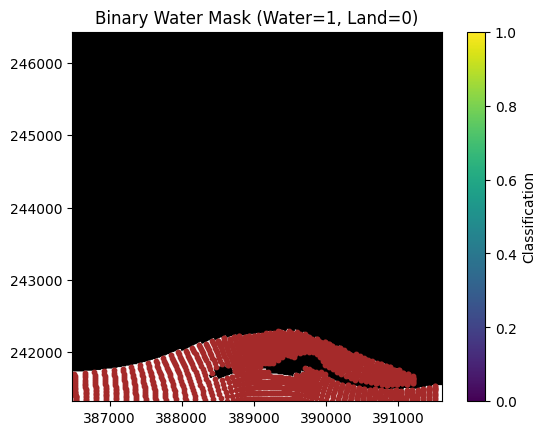

In [26]:

# Create binary mask (water=1, land=0)
binary_mask = (grid_z > 0.1).astype(np.uint8)  # Convert to 0 or 1

print(binary_mask.shape)

# Save binary mask as a new raster
binary_raster = "P:/11207608-coclico/MSc_students/Daniel/Scripts/outputs/water_mask.tif"

with rasterio.open(
    output_raster, "w",
    driver="GTiff",
    height=binary_mask.shape[0],
    width=binary_mask.shape[1],
    count=1,
    dtype=binary_mask.dtype,  # Save as binary format
    crs="EPSG:28992",
    transform=transform
) as dst:
    dst.write(binary_mask, 1)

print(f"Raster dimensions: {width} x {height} pixels")

# Plot binary mask
plt.imshow(binary_mask, extent=[xmin, xmax, ymin, ymax], origin="lower", cmap="gray")
plt.scatter(x_rot_land, y_rot_land, c="brown", s=10, label="Land")
plt.title("Binary Water Mask (Water=1, Land=0)")
plt.colorbar(label="Classification")
plt.show()




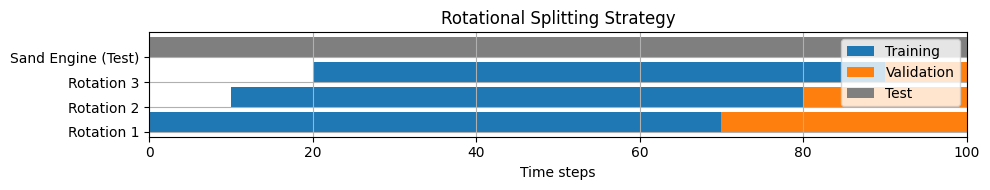

In [78]:
import matplotlib.pyplot as plt

datasets = ['Rotation 1', 'Rotation 2', 'Rotation 3', 'Sand Engine (Test)']
colors = ['#1f77b4', '#ff7f0e', '#7f7f7f']  # Train, Val, Test

fig, ax = plt.subplots(figsize=(10, 2))

# Define lengths
total_length = 100
train_length = 70
val_length = 30

# Create rotational bars
offsets = [0, 10, 20]
for i, offset in enumerate(offsets):
    ax.broken_barh([(offset, train_length), (offset + train_length, val_length)],
                   (i, 0.8), facecolors=(colors[0], colors[1]))

# Sand Engine test bar
ax.broken_barh([(0, total_length)], (3, 0.8), facecolors=colors[2])

# Labels
ax.set_yticks(range(4))
ax.set_yticklabels(datasets)
ax.set_xlabel("Time steps")
ax.set_xlim(0, total_length)
ax.set_title("Rotational Splitting Strategy")
ax.grid(True)

# Legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors[0], label='Training'),
                   Patch(facecolor=colors[1], label='Validation'),
                   Patch(facecolor=colors[2], label='Test')]
ax.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()


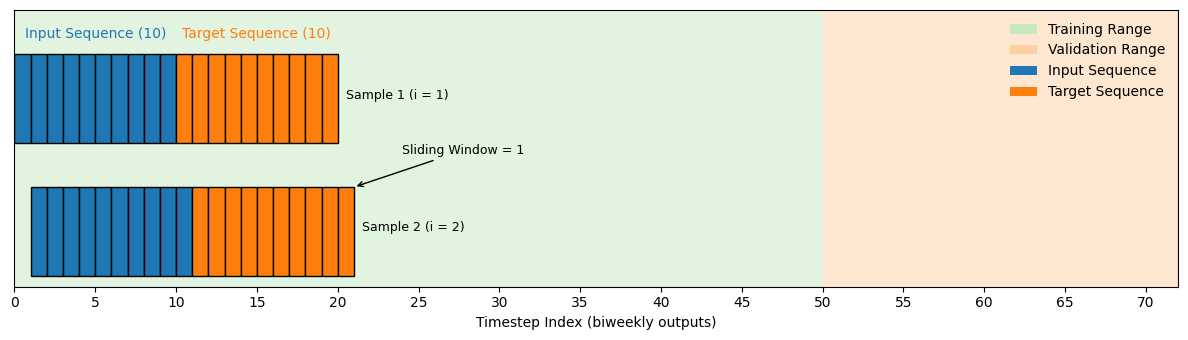

In [95]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Parameters
total_frames = 72
input_len = 10
target_len = 10
sequence_len = input_len + target_len
train_end = 50
val_start = train_end
window_step = 1

# Colors
input_color = '#1f77b4'  # Blue
target_color = '#ff7f0e'  # Orange
train_color = '#c7e9c0'  # Light green
val_color = '#fdd0a2'  # Light orange

# Create plot
fig, ax = plt.subplots(figsize=(12, 3.5))

# Background train/val shading
ax.axvspan(0, train_end, facecolor=train_color, alpha=0.5, label="Training Range")
ax.axvspan(val_start, total_frames, facecolor=val_color, alpha=0.5, label="Validation Range")

# First example sliding window at i=5
i1 = 0
for t in range(i1, i1 + input_len):
    ax.add_patch(patches.Rectangle((t, 1.3), 1, 0.8, facecolor=input_color, edgecolor='black'))
for t in range(i1 + input_len, i1 + sequence_len):
    ax.add_patch(patches.Rectangle((t, 1.3), 1, 0.8, facecolor=target_color, edgecolor='black'))

# Second sliding window at i+1=6 (slid by 1 timestep)
i2 = i1 + window_step
for t in range(i2, i2 + input_len):
    ax.add_patch(patches.Rectangle((t, 0.1), 1, 0.8, facecolor=input_color, edgecolor='black'))
for t in range(i2 + input_len, i2 + sequence_len):
    ax.add_patch(patches.Rectangle((t, 0.1), 1, 0.8, facecolor=target_color, edgecolor='black'))

# Frame ticks
ax.set_xlim(0, total_frames)
ax.set_ylim(0, 2.5)
ax.set_xticks(range(0, total_frames + 1, 5))
ax.set_yticks([])
ax.set_xlabel('Timestep Index (biweekly outputs)')
#ax.set_title('Sliding Window Approach for Input–Target Sequence Construction')

# Annotations
ax.text(i1 + input_len/2, 2.25, 'Input Sequence (10)', color=input_color, ha='center', fontsize=10)
ax.text(i1 + input_len + target_len/2, 2.25, 'Target Sequence (10)', color=target_color, ha='center', fontsize=10)
ax.text(20.5, 1.7, 'Sample 1 (i = 1)', fontsize=9)
ax.text(21.5, 0.5, 'Sample 2 (i = 2)', fontsize=9)
ax.annotate('Sliding Window = 1', xy=(21, 0.9), xytext=(24, 1.2),
            arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=9)

# Legend
legend_elements = [
    patches.Patch(facecolor=train_color, label='Training Range'),
    patches.Patch(facecolor=val_color, label='Validation Range'),
    patches.Patch(facecolor=input_color, label='Input Sequence'),
    patches.Patch(facecolor=target_color, label='Target Sequence')
]
ax.legend(handles=legend_elements, loc='upper right', frameon=False)

plt.tight_layout()
plt.savefig("/p/11207608-coclico/MSc_students/Daniel/Scripts/outputs/Figures/Sliding_window.png", dpi=300)
plt.show()
